In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt,ExponentialSmoothing

In [2]:
harga_saham=[3.06 , 2.96 , 3.03 , 2.99 , 3.09 , 3.02 , 2.87 , 2.67 , 2.69 ,
       2.75 , 2.8  , 2.79 , 2.8  , 2.8  , 2.85 , 2.85 , 2.85 , 2.86 ,
       2.82 , 2.86 , 2.89 , 2.9  , 2.9  , 2.89 , 2.89 , 2.89 , 2.88 ,
       2.92 , 2.87 , 2.91 , 2.89 , 2.91 , 2.91 , 2.89 , 2.91 , 2.91 ,
       2.92 , 2.89 , 2.82 , 2.77 , 2.83 , 2.78 , 2.72 , 2.73 , 2.72 ,
       2.76 , 2.63 , 2.46 , 2.44 , 2.44 , 2.53 , 2.55 , 2.47 , 2.56 ,
       2.51 , 2.55 , 2.56 , 2.59 , 2.63 , 2.59 , 2.54 , 2.41 , 2.47 ,
       2.44 , 2.41 , 2.38 , 2.36 , 2.27 , 2.24 , 2.36 , 2.35 , 2.29 ,
       2.21 , 2.24 , 2.26 , 2.24 , 2.26 , 2.27 , 2.22 , 2.26 , 2.25 ,
       2.25 , 2.24 , 2.25 , 2.3  , 2.3  , 2.35 , 2.35 , 2.29 , 2.24 ,
       2.22 , 2.22 , 2.18 , 2.27 , 2.19 , 2.14 , 2.02 , 2.1  , 2.05 ,
       2.03 , 2.04 , 2.07 , 2.25 , 2.42 , 2.37 , 2.41 , 2.44 , 2.49 ,
       2.56 , 2.54 , 2.47 , 2.51 , 2.54 , 2.7  , 2.66 , 2.67 , 2.8  ,
       2.61 , 2.6  , 2.6  , 2.45 , 2.38 , 2.31 , 2.15 , 2.16 , 2.14 ,
       2.16 , 2.1  , 2.08 , 2.06 , 2.02 , 1.97 , 1.86 , 1.88 , 1.925,
       1.885, 1.865, 1.785, 1.76 , 1.755, 1.715]

In [3]:
index= pd.date_range(start='11/1/2022', end='5/31/2023', freq='D')
saham = pd.Series(harga_saham)

In [4]:
index

DatetimeIndex(['2022-11-01', '2022-11-02', '2022-11-03', '2022-11-04',
               '2022-11-05', '2022-11-06', '2022-11-07', '2022-11-08',
               '2022-11-09', '2022-11-10',
               ...
               '2023-05-22', '2023-05-23', '2023-05-24', '2023-05-25',
               '2023-05-26', '2023-05-27', '2023-05-28', '2023-05-29',
               '2023-05-30', '2023-05-31'],
              dtype='datetime64[ns]', length=212, freq='D')

In [5]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

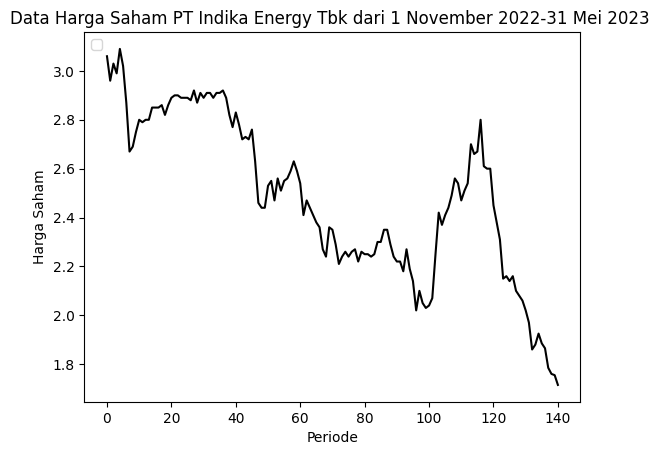

In [6]:
plt.plot(saham, color='black')
plt.xlabel('Periode')
plt.ylabel('Harga Saham')
plt.title('Data Harga Saham PT Indika Energy Tbk dari 1 November 2022-31 Mei 2023 ')
plt.legend(loc=2)

#**Double Exponential Smoothing Holt**

In [7]:
fit1 = Holt(saham).fit()
fcast1 = fit1.forecast(10).rename("Holt's linear trend")
print(fit1.summary())

                              Holt Model Results                              
Dep. Variable:                   None   No. Observations:                  141
Model:                           Holt   SSE                              0.575
Optimized:                       True   AIC                           -767.863
Trend:                       Additive   BIC                           -756.068
Seasonal:                        None   AICC                          -767.236
Seasonal Periods:                None   Date:                 Tue, 06 Jun 2023
Box-Cox:                        False   Time:                         12:44:19
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000                alpha                 True
smoothing_trend           1.1132e-14                

In [8]:
fit1.fittedvalues

0      3.060000
1      3.050393
2      2.950393
3      3.020393
4      2.980393
         ...   
136    1.875393
137    1.855393
138    1.775393
139    1.750393
140    1.745393
Length: 141, dtype: float64

In [9]:
print(fcast1)

141    1.705393
142    1.695786
143    1.686179
144    1.676571
145    1.666964
146    1.657357
147    1.647750
148    1.638143
149    1.628536
150    1.618928
Name: Holt's linear trend, dtype: float64


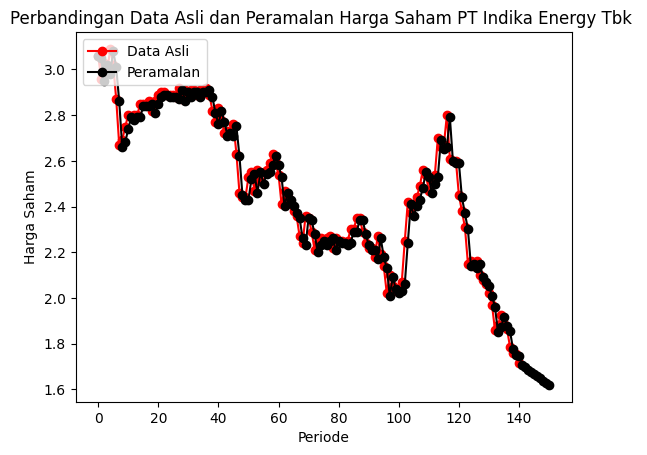

In [10]:
plt.title('Perbandingan Data Asli dan Peramalan Harga Saham PT Indika Energy Tbk ')
plt.xlabel('Periode')
plt.ylabel('Harga Saham')
# Actual data
plt.plot(saham, label='Data Asli',color='red',marker='o')
# Holt's Linear Trend
plt.plot(fcast1,label='Peramalan',color='black',marker='o')
plt.plot(fit1.fittedvalues,color='black',marker='o')
plt.legend(loc=2)

#**Menghitung Nilai Mape**

In [14]:
def mape(actual, pred):
 actual, pred = np.array(actual), np.array(pred)
 mape = np.mean(np.abs((actual - pred)/harga_saham))*100
 return mape
actual = harga_saham
pred = fit1.fittedvalues
print('mape :', mape(harga_saham, fit1.fittedvalues))

mape : 1.9163696618768729
